In [2]:
# You can add dependencies here if needed
!pip install datasets numpy scikit-learn matplotlib tensorflow pandas

You should consider upgrading via the 'C:\Users\gsald\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import pandas as pd

In [2]:
from datasets import load_dataset
dataset = load_dataset('cifar10')

Found cached dataset cifar10 (/Users/gregvs/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4)


  0%|          | 0/2 [00:00<?, ?it/s]

In [35]:
# Prepare the datasets
test = list(dataset['test']) # 10,000
train = list(dataset['train'])[:40_000] # 40,000
validation = list(dataset['train'])[40_000:] # 10,000

def preprocess(dataset):
  """Returns and X and y normalized dataset"""
  X, y = [], []
  for i in range(len(dataset)):
    X.append(np.array(dataset[i]['img'].getdata()).flatten() / 255)
    y.append(dataset[i]['label'])
  return np.array(X), np.array(y)

X_tr, y_tr = preprocess(train)
X_val, y_val = preprocess(validation)
X_te, y_te = preprocess(test)

print("Train set shape", X_tr.shape, y_tr.shape)
print("Validation set shape", X_val.shape, y_val.shape)
print("Test set shape", X_te.shape, y_te.shape)

Train set shape (40000, 3072) (40000,)
Validation set shape (10000, 3072) (10000,)
Test set shape (10000, 3072) (10000,)


In [36]:
# kNN
def train_knn(k):
  """Returns (train accuracy, validation accuracy)"""
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_tr, y_tr)

  y_tr_pred = model.predict(X_tr)
  y_val_pred = model.predict(X_val)
  return accuracy_score(y_tr, y_tr_pred), accuracy_score(y_val, y_val_pred)

k_vals = [1, 3, 5, 10, 25, 100]
knn_tr_accs = []
knn_val_accs = []
for k in k_vals:
    tr_acc, val_acc = train_knn(k)
    knn_tr_accs.append(tr_acc)
    knn_val_accs.append(val_acc)

KeyboardInterrupt: 

In [37]:
# Run on test data
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_tr, y_tr)
y_te_pred = model.predict(X_te)
print("Test Accuracy:", accuracy_score(y_te, y_te_pred))

Test Accuracy: 0.3308


In [26]:
pd.DataFrame(
  zip(k_vals, knn_tr_accs, knn_val_accs),
  columns=['k', 'Train Accuracy', 'Validation Accuracy']).round(decimals=3)

,k,Train Accuracy,Validation Accuracy
0,1,1.000,0.336
1,3,0.571,0.326
2,5,0.498,0.335
3,10,0.421,0.334
4,25,0.361,0.325
5,100,0.308,0.300


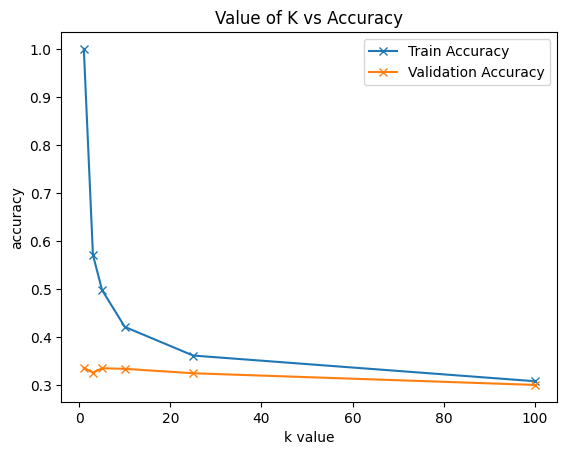

In [27]:
fig, knn_ax = plt.subplots()
knn_ax.plot(k_vals, knn_tr_accs, label='Train Accuracy', marker='x')
knn_ax.plot(k_vals, knn_val_accs, label='Validation Accuracy', marker='x')
knn_ax.set_xlabel('k value')
knn_ax.set_ylabel('accuracy')
knn_ax.set_title('Value of K vs Accuracy')
knn_ax.legend()

In [29]:
# Logistic
def train_logistic():
  n_classes = 10
  n_features = 32 * 32 * 3
  model = Sequential()
  model.add(Dense(n_classes, activation="softmax", input_dim=n_features))
  model.compile(optimizer=tf.keras.optimizers.SGD(), loss="sparse_categorical_crossentropy", metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
  return model.fit(X_tr,
            y_tr,
            batch_size=128,
            epochs=100,
            validation_data=(X_val, y_val))

history = train_logistic()

Epoch 1/100
 17/313 [>.............................] - ETA: 1s - loss: 2.3077 - categorical_accuracy: 0.1227

2022-11-21 16:09:36.932946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


308/313 [============================>.] - ETA: 0s - loss: 2.0380 - categorical_accuracy: 0.2696

2022-11-21 16:09:39.239610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 9ms/step - loss: 2.0363 - categorical_accuracy: 0.2704 - val_loss: 1.9465 - val_categorical_accuracy: 0.3093
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 1.8938 - categorical_accuracy: 0.3376 - val_loss: 1.8617 - val_categorical_accuracy: 0.3472
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 1.8512 - categorical_accuracy: 0.3547 - val_loss: 1.8449 - val_categorical_accuracy: 0.3490
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 1.8283 - categorical_accuracy: 0.3628 - val_loss: 1.8177 - val_categorical_accuracy: 0.3637
Epoch 5/100
313/313 [==============================] - 2s 8ms/step - loss: 1.8115 - categorical_accuracy: 0.3713 - val_loss: 1.8250 - val_categorical_accuracy: 0.3525
Epoch 6/100
313/313 [==============================] - 2s 8ms/step - loss: 1.8007 - categorical_accuracy: 0.3760 - val_loss: 1.8102 - val_categorical_accuracy: 0.3716
Epoch 7/10

Epoch 50/100
313/313 [==============================] - 2s 7ms/step - loss: 1.6832 - categorical_accuracy: 0.4251 - val_loss: 1.7364 - val_categorical_accuracy: 0.3904
Epoch 51/100
313/313 [==============================] - 2s 8ms/step - loss: 1.6831 - categorical_accuracy: 0.4245 - val_loss: 1.7211 - val_categorical_accuracy: 0.4037
Epoch 52/100
313/313 [==============================] - 2s 8ms/step - loss: 1.6819 - categorical_accuracy: 0.4258 - val_loss: 1.7301 - val_categorical_accuracy: 0.4056
Epoch 53/100
313/313 [==============================] - 2s 7ms/step - loss: 1.6817 - categorical_accuracy: 0.4249 - val_loss: 1.7332 - val_categorical_accuracy: 0.4025
Epoch 54/100
313/313 [==============================] - 2s 7ms/step - loss: 1.6796 - categorical_accuracy: 0.4266 - val_loss: 1.7304 - val_categorical_accuracy: 0.4014
Epoch 55/100
313/313 [==============================] - 2s 8ms/step - loss: 1.6786 - categorical_accuracy: 0.4271 - val_loss: 1.7188 - val_categorical_accuracy:

Epoch 99/100
313/313 [==============================] - 2s 7ms/step - loss: 1.6520 - categorical_accuracy: 0.4379 - val_loss: 1.7513 - val_categorical_accuracy: 0.4015
Epoch 100/100
313/313 [==============================] - 2s 7ms/step - loss: 1.6511 - categorical_accuracy: 0.4368 - val_loss: 1.7301 - val_categorical_accuracy: 0.4065


Text(0.5, 0, 'epochs')

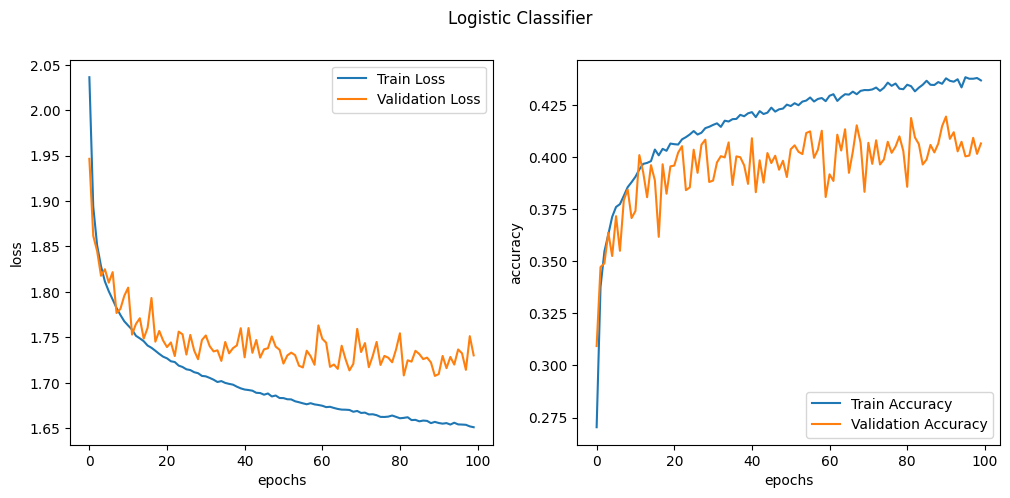

In [35]:
fig, (loss_ax, acc_ax) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Logistic Classifier")
loss_ax.plot(history.history['loss'], label='Train Loss')
loss_ax.plot(history.history['val_loss'], label='Validation Loss')
loss_ax.legend()
loss_ax.set_ylabel('loss')
loss_ax.set_xlabel('epochs')
acc_ax.plot(history.history['categorical_accuracy'], label='Train Accuracy')
acc_ax.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
acc_ax.legend()
acc_ax.set_ylabel('accuracy')
acc_ax.set_xlabel('epochs')

In [83]:
# Neural Network
def train_neural_net(layer_dims, lr=0.005, epochs=200, X_tr=X_tr, y_tr=y_tr):
  """Returns the (model, model_history) based on training with n_samples of training data"""
  n_classes = 10
  n_features = 32 * 32 * 3
  model = Sequential()
  model.add(InputLayer(input_shape=(n_features,)))

  for dim in layer_dims:
    model.add(Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.01)))
    
  model.add(Dense(n_classes, activation="softmax"))

  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr), 
                loss="sparse_categorical_crossentropy", 
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
    
  return model, model.fit(X_tr,
            y_tr,
            epochs=epochs,
            batch_size=128,
            validation_data=(X_val, y_val))

In [36]:
print("Training model a")
model_a, history_a = train_neural_net((64,))

print("Training model b")
model_b, history_b = train_neural_net((512,))

print("Training model c")
model_c, history_c = train_neural_net((64, 64))

print("Training model d")
model_d, history_d = train_neural_net((256, 64))

print("Training model e")
model_e, history_e = train_neural_net((512, 256, 64))

print("Training model f")
model_f, history_f = train_neural_net((512, 64))

Training model a
Epoch 1/200
313/313 [==============================] - 2s 5ms/step - loss: 3.4099 - categorical_accuracy: 0.2040 - val_loss: 3.1551 - val_categorical_accuracy: 0.3001
Epoch 2/200
313/313 [==============================] - 1s 4ms/step - loss: 3.1270 - categorical_accuracy: 0.3063 - val_loss: 3.0172 - val_categorical_accuracy: 0.3348
Epoch 3/200
313/313 [==============================] - 1s 4ms/step - loss: 2.9951 - categorical_accuracy: 0.3346 - val_loss: 2.9197 - val_categorical_accuracy: 0.3417
Epoch 4/200
313/313 [==============================] - 1s 5ms/step - loss: 2.8894 - categorical_accuracy: 0.3481 - val_loss: 2.8179 - val_categorical_accuracy: 0.3656
Epoch 5/200
313/313 [==============================] - 1s 5ms/step - loss: 2.8037 - categorical_accuracy: 0.3651 - val_loss: 2.7432 - val_categorical_accuracy: 0.3629
Epoch 6/200
313/313 [==============================] - 1s 5ms/step - loss: 2.7206 - categorical_accuracy: 0.3729 - val_loss: 2.6751 - val_categorica

Epoch 50/200
313/313 [==============================] - 2s 5ms/step - loss: 1.6582 - categorical_accuracy: 0.4754 - val_loss: 1.7028 - val_categorical_accuracy: 0.4503
Epoch 51/200
313/313 [==============================] - 1s 5ms/step - loss: 1.6416 - categorical_accuracy: 0.4787 - val_loss: 1.6786 - val_categorical_accuracy: 0.4553
Epoch 52/200
313/313 [==============================] - 2s 5ms/step - loss: 1.6397 - categorical_accuracy: 0.4769 - val_loss: 1.6738 - val_categorical_accuracy: 0.4581
Epoch 53/200
313/313 [==============================] - 2s 5ms/step - loss: 1.6404 - categorical_accuracy: 0.4772 - val_loss: 1.6701 - val_categorical_accuracy: 0.4577
Epoch 54/200
313/313 [==============================] - 2s 5ms/step - loss: 1.6354 - categorical_accuracy: 0.4735 - val_loss: 1.6852 - val_categorical_accuracy: 0.4558
Epoch 55/200
313/313 [==============================] - 2s 5ms/step - loss: 1.6239 - categorical_accuracy: 0.4809 - val_loss: 1.6691 - val_categorical_accuracy:

Epoch 99/200
313/313 [==============================] - 1s 5ms/step - loss: 1.5261 - categorical_accuracy: 0.5043 - val_loss: 1.6279 - val_categorical_accuracy: 0.4572
Epoch 100/200
313/313 [==============================] - 1s 5ms/step - loss: 1.5388 - categorical_accuracy: 0.5027 - val_loss: 1.6136 - val_categorical_accuracy: 0.4684
Epoch 101/200
313/313 [==============================] - 1s 4ms/step - loss: 1.5218 - categorical_accuracy: 0.5118 - val_loss: 1.6418 - val_categorical_accuracy: 0.4561
Epoch 102/200
313/313 [==============================] - 1s 4ms/step - loss: 1.5264 - categorical_accuracy: 0.5051 - val_loss: 1.5732 - val_categorical_accuracy: 0.4885
Epoch 103/200
313/313 [==============================] - 1s 4ms/step - loss: 1.5269 - categorical_accuracy: 0.5046 - val_loss: 1.6996 - val_categorical_accuracy: 0.4339
Epoch 104/200
313/313 [==============================] - 1s 5ms/step - loss: 1.5292 - categorical_accuracy: 0.5036 - val_loss: 1.6044 - val_categorical_accu

313/313 [==============================] - 2s 5ms/step - loss: 1.4707 - categorical_accuracy: 0.5227 - val_loss: 1.5848 - val_categorical_accuracy: 0.4825
Epoch 196/200
313/313 [==============================] - 1s 4ms/step - loss: 1.4899 - categorical_accuracy: 0.5193 - val_loss: 1.5949 - val_categorical_accuracy: 0.4772
Epoch 197/200
313/313 [==============================] - 1s 5ms/step - loss: 1.4877 - categorical_accuracy: 0.5203 - val_loss: 1.6075 - val_categorical_accuracy: 0.4777
Epoch 198/200
313/313 [==============================] - 1s 4ms/step - loss: 1.4897 - categorical_accuracy: 0.5197 - val_loss: 1.5786 - val_categorical_accuracy: 0.4852
Epoch 199/200
313/313 [==============================] - 1s 4ms/step - loss: 1.4749 - categorical_accuracy: 0.5239 - val_loss: 1.6011 - val_categorical_accuracy: 0.4757
Epoch 200/200
313/313 [==============================] - 1s 4ms/step - loss: 1.4796 - categorical_accuracy: 0.5248 - val_loss: 1.6868 - val_categorical_accuracy: 0.4430


Epoch 44/200
313/313 [==============================] - 1s 5ms/step - loss: 1.7070 - categorical_accuracy: 0.4691 - val_loss: 1.7396 - val_categorical_accuracy: 0.4478
Epoch 45/200
313/313 [==============================] - 2s 5ms/step - loss: 1.7135 - categorical_accuracy: 0.4600 - val_loss: 1.7423 - val_categorical_accuracy: 0.4419
Epoch 46/200
313/313 [==============================] - 2s 5ms/step - loss: 1.6887 - categorical_accuracy: 0.4694 - val_loss: 1.7210 - val_categorical_accuracy: 0.4459
Epoch 47/200
313/313 [==============================] - 1s 5ms/step - loss: 1.6921 - categorical_accuracy: 0.4697 - val_loss: 1.7364 - val_categorical_accuracy: 0.4374
Epoch 48/200
313/313 [==============================] - 2s 5ms/step - loss: 1.6787 - categorical_accuracy: 0.4697 - val_loss: 1.7048 - val_categorical_accuracy: 0.4551
Epoch 49/200
313/313 [==============================] - 2s 5ms/step - loss: 1.6712 - categorical_accuracy: 0.4709 - val_loss: 1.6924 - val_categorical_accuracy:

Epoch 93/200
313/313 [==============================] - 1s 4ms/step - loss: 1.5485 - categorical_accuracy: 0.5010 - val_loss: 1.6218 - val_categorical_accuracy: 0.4597
Epoch 94/200
313/313 [==============================] - 1s 5ms/step - loss: 1.5465 - categorical_accuracy: 0.5016 - val_loss: 1.6002 - val_categorical_accuracy: 0.4724
Epoch 95/200
313/313 [==============================] - 2s 5ms/step - loss: 1.5487 - categorical_accuracy: 0.5035 - val_loss: 1.5984 - val_categorical_accuracy: 0.4780
Epoch 96/200
313/313 [==============================] - 1s 5ms/step - loss: 1.5413 - categorical_accuracy: 0.5026 - val_loss: 1.6040 - val_categorical_accuracy: 0.4729
Epoch 97/200
313/313 [==============================] - 2s 5ms/step - loss: 1.5431 - categorical_accuracy: 0.5005 - val_loss: 1.6657 - val_categorical_accuracy: 0.4530
Epoch 98/200
313/313 [==============================] - 2s 5ms/step - loss: 1.5463 - categorical_accuracy: 0.4996 - val_loss: 1.5945 - val_categorical_accuracy:

313/313 [==============================] - 1s 5ms/step - loss: 1.4872 - categorical_accuracy: 0.5224 - val_loss: 1.6090 - val_categorical_accuracy: 0.4727
Epoch 190/200
313/313 [==============================] - 1s 4ms/step - loss: 1.4863 - categorical_accuracy: 0.5214 - val_loss: 1.6213 - val_categorical_accuracy: 0.4660
Epoch 191/200
313/313 [==============================] - 1s 4ms/step - loss: 1.4787 - categorical_accuracy: 0.5231 - val_loss: 1.6241 - val_categorical_accuracy: 0.4631
Epoch 192/200
313/313 [==============================] - 2s 5ms/step - loss: 1.4914 - categorical_accuracy: 0.5218 - val_loss: 1.6126 - val_categorical_accuracy: 0.4640
Epoch 193/200
313/313 [==============================] - 1s 4ms/step - loss: 1.4771 - categorical_accuracy: 0.5313 - val_loss: 1.6404 - val_categorical_accuracy: 0.4556
Epoch 194/200
313/313 [==============================] - 2s 5ms/step - loss: 1.4804 - categorical_accuracy: 0.5261 - val_loss: 1.7063 - val_categorical_accuracy: 0.4258


Epoch 38/200
313/313 [==============================] - 2s 5ms/step - loss: 1.9034 - categorical_accuracy: 0.4436 - val_loss: 1.8923 - val_categorical_accuracy: 0.4419
Epoch 39/200
313/313 [==============================] - 2s 5ms/step - loss: 1.8865 - categorical_accuracy: 0.4420 - val_loss: 1.8872 - val_categorical_accuracy: 0.4396
Epoch 40/200
313/313 [==============================] - 2s 5ms/step - loss: 1.8703 - categorical_accuracy: 0.4464 - val_loss: 1.9053 - val_categorical_accuracy: 0.4178
Epoch 41/200
313/313 [==============================] - 2s 5ms/step - loss: 1.8479 - categorical_accuracy: 0.4504 - val_loss: 1.8639 - val_categorical_accuracy: 0.4403
Epoch 42/200
313/313 [==============================] - 2s 5ms/step - loss: 1.8472 - categorical_accuracy: 0.4457 - val_loss: 1.8516 - val_categorical_accuracy: 0.4451
Epoch 43/200
313/313 [==============================] - 2s 5ms/step - loss: 1.8420 - categorical_accuracy: 0.4461 - val_loss: 1.8688 - val_categorical_accuracy:

Epoch 87/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6389 - categorical_accuracy: 0.4826 - val_loss: 1.6688 - val_categorical_accuracy: 0.4661
Epoch 88/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6367 - categorical_accuracy: 0.4837 - val_loss: 1.7213 - val_categorical_accuracy: 0.4477
Epoch 89/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6358 - categorical_accuracy: 0.4820 - val_loss: 1.7370 - val_categorical_accuracy: 0.4516
Epoch 90/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6288 - categorical_accuracy: 0.4880 - val_loss: 1.6618 - val_categorical_accuracy: 0.4708
Epoch 91/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6310 - categorical_accuracy: 0.4844 - val_loss: 1.6622 - val_categorical_accuracy: 0.4697
Epoch 92/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6252 - categorical_accuracy: 0.4889 - val_loss: 1.9071 - val_categorical_accuracy:

313/313 [==============================] - 2s 6ms/step - loss: 1.5653 - categorical_accuracy: 0.5105 - val_loss: 1.6309 - val_categorical_accuracy: 0.4853
Epoch 184/200
313/313 [==============================] - 2s 6ms/step - loss: 1.5550 - categorical_accuracy: 0.5140 - val_loss: 1.6642 - val_categorical_accuracy: 0.4763
Epoch 185/200
313/313 [==============================] - 2s 6ms/step - loss: 1.5511 - categorical_accuracy: 0.5153 - val_loss: 1.6436 - val_categorical_accuracy: 0.4814
Epoch 186/200
313/313 [==============================] - 2s 6ms/step - loss: 1.5622 - categorical_accuracy: 0.5123 - val_loss: 1.6642 - val_categorical_accuracy: 0.4668
Epoch 187/200
313/313 [==============================] - 2s 6ms/step - loss: 1.5564 - categorical_accuracy: 0.5114 - val_loss: 1.6120 - val_categorical_accuracy: 0.4938
Epoch 188/200
313/313 [==============================] - 2s 6ms/step - loss: 1.5614 - categorical_accuracy: 0.5117 - val_loss: 1.6187 - val_categorical_accuracy: 0.4858


Epoch 32/200
313/313 [==============================] - 2s 6ms/step - loss: 1.9874 - categorical_accuracy: 0.4426 - val_loss: 2.0012 - val_categorical_accuracy: 0.4218
Epoch 33/200
313/313 [==============================] - 2s 6ms/step - loss: 1.9615 - categorical_accuracy: 0.4417 - val_loss: 2.0006 - val_categorical_accuracy: 0.4200
Epoch 34/200
313/313 [==============================] - 2s 6ms/step - loss: 1.9550 - categorical_accuracy: 0.4417 - val_loss: 1.9664 - val_categorical_accuracy: 0.4296
Epoch 35/200
313/313 [==============================] - 2s 6ms/step - loss: 1.9312 - categorical_accuracy: 0.4433 - val_loss: 1.9684 - val_categorical_accuracy: 0.4197
Epoch 36/200
313/313 [==============================] - 2s 6ms/step - loss: 1.9105 - categorical_accuracy: 0.4520 - val_loss: 1.9143 - val_categorical_accuracy: 0.4390
Epoch 37/200
313/313 [==============================] - 2s 6ms/step - loss: 1.9042 - categorical_accuracy: 0.4484 - val_loss: 1.9014 - val_categorical_accuracy:

Epoch 81/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6367 - categorical_accuracy: 0.4807 - val_loss: 1.6867 - val_categorical_accuracy: 0.4669
Epoch 82/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6417 - categorical_accuracy: 0.4830 - val_loss: 1.6669 - val_categorical_accuracy: 0.4681
Epoch 83/200
313/313 [==============================] - 2s 5ms/step - loss: 1.6377 - categorical_accuracy: 0.4840 - val_loss: 1.7624 - val_categorical_accuracy: 0.4324
Epoch 84/200
313/313 [==============================] - 2s 5ms/step - loss: 1.6362 - categorical_accuracy: 0.4839 - val_loss: 1.6796 - val_categorical_accuracy: 0.4629
Epoch 85/200
313/313 [==============================] - 2s 5ms/step - loss: 1.6383 - categorical_accuracy: 0.4861 - val_loss: 1.7415 - val_categorical_accuracy: 0.4302
Epoch 86/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6342 - categorical_accuracy: 0.4835 - val_loss: 1.7168 - val_categorical_accuracy:

313/313 [==============================] - 1s 5ms/step - loss: 1.5573 - categorical_accuracy: 0.5117 - val_loss: 1.6629 - val_categorical_accuracy: 0.4710
Epoch 178/200
313/313 [==============================] - 2s 5ms/step - loss: 1.5525 - categorical_accuracy: 0.5155 - val_loss: 1.6149 - val_categorical_accuracy: 0.4905
Epoch 179/200
313/313 [==============================] - 2s 7ms/step - loss: 1.5535 - categorical_accuracy: 0.5171 - val_loss: 1.6845 - val_categorical_accuracy: 0.4625
Epoch 180/200
313/313 [==============================] - 2s 6ms/step - loss: 1.5657 - categorical_accuracy: 0.5092 - val_loss: 1.6065 - val_categorical_accuracy: 0.4944
Epoch 181/200
313/313 [==============================] - 2s 7ms/step - loss: 1.5563 - categorical_accuracy: 0.5131 - val_loss: 1.6376 - val_categorical_accuracy: 0.4795
Epoch 182/200
313/313 [==============================] - 2s 7ms/step - loss: 1.5554 - categorical_accuracy: 0.5148 - val_loss: 1.6326 - val_categorical_accuracy: 0.4814


Epoch 26/200
313/313 [==============================] - 2s 7ms/step - loss: 2.3199 - categorical_accuracy: 0.4144 - val_loss: 2.3418 - val_categorical_accuracy: 0.3939
Epoch 27/200
313/313 [==============================] - 2s 8ms/step - loss: 2.2974 - categorical_accuracy: 0.4125 - val_loss: 2.3189 - val_categorical_accuracy: 0.3821
Epoch 28/200
313/313 [==============================] - 2s 7ms/step - loss: 2.2629 - categorical_accuracy: 0.4152 - val_loss: 2.2435 - val_categorical_accuracy: 0.4097
Epoch 29/200
313/313 [==============================] - 2s 7ms/step - loss: 2.2285 - categorical_accuracy: 0.4144 - val_loss: 2.2252 - val_categorical_accuracy: 0.4026
Epoch 30/200
313/313 [==============================] - 2s 7ms/step - loss: 2.2053 - categorical_accuracy: 0.4179 - val_loss: 2.2275 - val_categorical_accuracy: 0.3961
Epoch 31/200
313/313 [==============================] - 2s 7ms/step - loss: 2.1629 - categorical_accuracy: 0.4235 - val_loss: 2.1595 - val_categorical_accuracy:

Epoch 75/200
313/313 [==============================] - 2s 7ms/step - loss: 1.7478 - categorical_accuracy: 0.4548 - val_loss: 1.7730 - val_categorical_accuracy: 0.4474
Epoch 76/200
313/313 [==============================] - 2s 5ms/step - loss: 1.7380 - categorical_accuracy: 0.4602 - val_loss: 1.7574 - val_categorical_accuracy: 0.4507
Epoch 77/200
313/313 [==============================] - 2s 7ms/step - loss: 1.7481 - categorical_accuracy: 0.4539 - val_loss: 1.7662 - val_categorical_accuracy: 0.4455
Epoch 78/200
313/313 [==============================] - 2s 8ms/step - loss: 1.7349 - categorical_accuracy: 0.4638 - val_loss: 1.7866 - val_categorical_accuracy: 0.4411
Epoch 79/200
313/313 [==============================] - 2s 7ms/step - loss: 1.7429 - categorical_accuracy: 0.4584 - val_loss: 1.8205 - val_categorical_accuracy: 0.4341
Epoch 80/200
313/313 [==============================] - 2s 7ms/step - loss: 1.7453 - categorical_accuracy: 0.4566 - val_loss: 1.8276 - val_categorical_accuracy:

313/313 [==============================] - 2s 7ms/step - loss: 1.6458 - categorical_accuracy: 0.4925 - val_loss: 1.6914 - val_categorical_accuracy: 0.4786
Epoch 172/200
313/313 [==============================] - 2s 7ms/step - loss: 1.6403 - categorical_accuracy: 0.4945 - val_loss: 1.7075 - val_categorical_accuracy: 0.4649
Epoch 173/200
313/313 [==============================] - 2s 7ms/step - loss: 1.6415 - categorical_accuracy: 0.4932 - val_loss: 1.7719 - val_categorical_accuracy: 0.4388
Epoch 174/200
313/313 [==============================] - 2s 7ms/step - loss: 1.6408 - categorical_accuracy: 0.4956 - val_loss: 1.7863 - val_categorical_accuracy: 0.4327
Epoch 175/200
313/313 [==============================] - 2s 7ms/step - loss: 1.6427 - categorical_accuracy: 0.4952 - val_loss: 1.7311 - val_categorical_accuracy: 0.4635
Epoch 176/200
313/313 [==============================] - 2s 7ms/step - loss: 1.6464 - categorical_accuracy: 0.4941 - val_loss: 1.7063 - val_categorical_accuracy: 0.4777


Epoch 68/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6853 - categorical_accuracy: 0.4701 - val_loss: 1.7028 - val_categorical_accuracy: 0.4614
Epoch 69/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6718 - categorical_accuracy: 0.4744 - val_loss: 1.7479 - val_categorical_accuracy: 0.4489
Epoch 70/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6797 - categorical_accuracy: 0.4724 - val_loss: 1.7147 - val_categorical_accuracy: 0.4516
Epoch 71/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6714 - categorical_accuracy: 0.4774 - val_loss: 1.7299 - val_categorical_accuracy: 0.4497
Epoch 72/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6731 - categorical_accuracy: 0.4729 - val_loss: 1.7027 - val_categorical_accuracy: 0.4556
Epoch 73/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6707 - categorical_accuracy: 0.4718 - val_loss: 1.7330 - val_categorical_accuracy:

Epoch 117/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6017 - categorical_accuracy: 0.4940 - val_loss: 1.6254 - val_categorical_accuracy: 0.4823
Epoch 118/200
313/313 [==============================] - 2s 6ms/step - loss: 1.5973 - categorical_accuracy: 0.4979 - val_loss: 1.6256 - val_categorical_accuracy: 0.4875
Epoch 119/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6057 - categorical_accuracy: 0.4974 - val_loss: 1.7071 - val_categorical_accuracy: 0.4521
Epoch 120/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6082 - categorical_accuracy: 0.4903 - val_loss: 1.6344 - val_categorical_accuracy: 0.4822
Epoch 121/200
313/313 [==============================] - 2s 6ms/step - loss: 1.6096 - categorical_accuracy: 0.4960 - val_loss: 1.6670 - val_categorical_accuracy: 0.4729
Epoch 122/200
313/313 [==============================] - 2s 6ms/step - loss: 1.5928 - categorical_accuracy: 0.4949 - val_loss: 1.6522 - val_categorical_acc

In [40]:
model_b, history_b = train_neural_net((512,))

Epoch 1/200
 16/313 [>.............................] - ETA: 2s - loss: 3.5591 - sparse_categorical_accuracy: 0.1323

2022-11-29 15:27:29.934307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


311/313 [============================>.] - ETA: 0s - loss: 3.3266 - sparse_categorical_accuracy: 0.2411

2022-11-29 15:27:32.170511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step - loss: 3.3259 - sparse_categorical_accuracy: 0.2411 - val_loss: 3.1748 - val_sparse_categorical_accuracy: 0.3013
Epoch 2/200
313/313 [==============================] - 2s 8ms/step - loss: 3.0995 - sparse_categorical_accuracy: 0.3154 - val_loss: 3.0375 - val_sparse_categorical_accuracy: 0.3225
Epoch 3/200
313/313 [==============================] - 3s 8ms/step - loss: 2.9720 - sparse_categorical_accuracy: 0.3425 - val_loss: 2.9179 - val_sparse_categorical_accuracy: 0.3419
Epoch 4/200
313/313 [==============================] - 3s 8ms/step - loss: 2.8721 - sparse_categorical_accuracy: 0.3561 - val_loss: 2.8164 - val_sparse_categorical_accuracy: 0.3645
Epoch 5/200
313/313 [==============================] - 2s 8ms/step - loss: 2.7860 - sparse_categorical_accuracy: 0.3676 - val_loss: 2.7412 - val_sparse_categorical_accuracy: 0.3680
Epoch 6/200
313/313 [==============================] - 2s 8ms/step - loss: 2.7083 - sparse_categorical_accu

313/313 [==============================] - 2s 8ms/step - loss: 1.5630 - sparse_categorical_accuracy: 0.4906 - val_loss: 1.6961 - val_sparse_categorical_accuracy: 0.4366
Epoch 92/200
313/313 [==============================] - 2s 7ms/step - loss: 1.5619 - sparse_categorical_accuracy: 0.4890 - val_loss: 1.6165 - val_sparse_categorical_accuracy: 0.4666
Epoch 93/200
313/313 [==============================] - 2s 7ms/step - loss: 1.5608 - sparse_categorical_accuracy: 0.4934 - val_loss: 1.6325 - val_sparse_categorical_accuracy: 0.4595
Epoch 94/200
313/313 [==============================] - 2s 7ms/step - loss: 1.5588 - sparse_categorical_accuracy: 0.4916 - val_loss: 1.6119 - val_sparse_categorical_accuracy: 0.4723
Epoch 95/200
313/313 [==============================] - 2s 7ms/step - loss: 1.5583 - sparse_categorical_accuracy: 0.4935 - val_loss: 1.6410 - val_sparse_categorical_accuracy: 0.4579
Epoch 96/200
313/313 [==============================] - 2s 7ms/step - loss: 1.5549 - sparse_categorical

Epoch 136/200
313/313 [==============================] - 2s 8ms/step - loss: 1.5183 - sparse_categorical_accuracy: 0.5089 - val_loss: 1.5723 - val_sparse_categorical_accuracy: 0.4867
Epoch 137/200
313/313 [==============================] - 2s 8ms/step - loss: 1.5209 - sparse_categorical_accuracy: 0.5064 - val_loss: 1.6068 - val_sparse_categorical_accuracy: 0.4674
Epoch 138/200
313/313 [==============================] - 2s 7ms/step - loss: 1.5182 - sparse_categorical_accuracy: 0.5076 - val_loss: 1.6028 - val_sparse_categorical_accuracy: 0.4686
Epoch 139/200
313/313 [==============================] - 2s 7ms/step - loss: 1.5208 - sparse_categorical_accuracy: 0.5060 - val_loss: 1.6302 - val_sparse_categorical_accuracy: 0.4536
Epoch 140/200
313/313 [==============================] - 2s 8ms/step - loss: 1.5151 - sparse_categorical_accuracy: 0.5099 - val_loss: 1.6106 - val_sparse_categorical_accuracy: 0.4632
Epoch 141/200
313/313 [==============================] - 2s 7ms/step - loss: 1.5210 -

Epoch 181/200
313/313 [==============================] - 2s 7ms/step - loss: 1.5002 - sparse_categorical_accuracy: 0.5146 - val_loss: 1.5828 - val_sparse_categorical_accuracy: 0.4792
Epoch 182/200
313/313 [==============================] - 2s 7ms/step - loss: 1.4988 - sparse_categorical_accuracy: 0.5149 - val_loss: 1.6539 - val_sparse_categorical_accuracy: 0.4653
Epoch 183/200
313/313 [==============================] - 2s 7ms/step - loss: 1.5018 - sparse_categorical_accuracy: 0.5140 - val_loss: 1.5682 - val_sparse_categorical_accuracy: 0.4854
Epoch 184/200
313/313 [==============================] - 2s 7ms/step - loss: 1.4960 - sparse_categorical_accuracy: 0.5192 - val_loss: 1.6033 - val_sparse_categorical_accuracy: 0.4805
Epoch 185/200
313/313 [==============================] - 2s 8ms/step - loss: 1.4949 - sparse_categorical_accuracy: 0.5164 - val_loss: 1.5784 - val_sparse_categorical_accuracy: 0.4790
Epoch 186/200
313/313 [==============================] - 2s 8ms/step - loss: 1.4935 -

In [41]:
model_b.evaluate(X_te, y_te)

313/313 [==============================] - 2s 6ms/step - loss: 1.6084 - sparse_categorical_accuracy: 0.4689


[1.6083974838256836, 0.46890002489089966]

KeyError: 'sparse_categorical_accuracy'

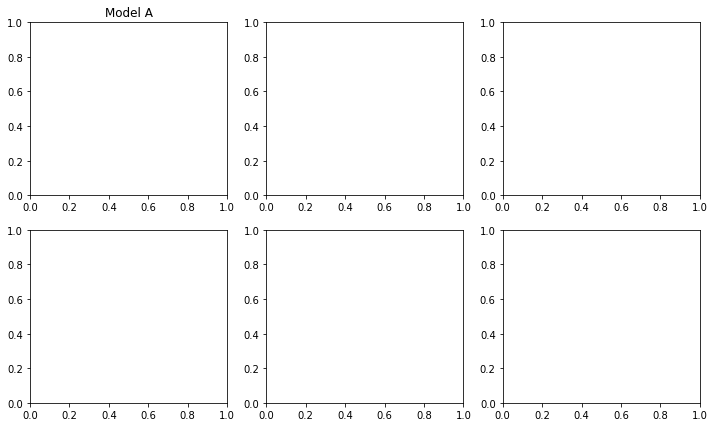

In [93]:
def plot_loss(axis, history):
    axis.plot(history.history['loss'], label='Train Loss')
    axis.plot(history.history['val_loss'], label='Validation Loss')
    axis.legend()
    axis.set_ylabel('loss')
    axis.set_xlabel('epochs')

def plot_accuracy(axis, history, title=''):
    axis.set_title(title)
    axis.plot(history.history['sparse_categorical_accuracy'], label='Train', color='red')
    axis.plot(history.history['val_sparse_categorical_accuracy'], label='Validation', color='green')
    axis.legend()
    axis.set_ylabel('accuracy')
    axis.set_xlabel('epochs')
    print(title, '- Train Acc:', max(history.history['sparse_categorical_accuracy']) * 100, '- Validation Acc:', 100 * max(history.history['val_sparse_categorical_accuracy']))
    
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 7))

plot_accuracy(ax1, history_a, 'Model A')
plot_accuracy(ax2, history_b, 'Model B')
plot_accuracy(ax3, history_c, 'Model C')
plot_accuracy(ax4, history_d, 'Model D')
plot_accuracy(ax5, history_e, 'Model E')
plot_accuracy(ax6, history_f, 'Model F')
fig.tight_layout()

# Convolutional Neural Network

In [96]:
# Convolutional Neural Network
from tensorflow.keras.regularizers import L2

def train_cnn(model, epochs=50):
  n_classes = 10
  alpha = 0

  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss="sparse_categorical_crossentropy", metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
  return model, model.fit(X_tr.reshape((-1, 32, 32, 3)),
            y_tr,
            epochs=epochs,
            batch_size=128,
            validation_data=(X_val.reshape((-1, 32, 32, 3)), y_val))


In [104]:
alpha = 0.01

def build_conv_layer(units, kernel_size=3, alpha=0):
    return Conv2D(units, kernel_size=kernel_size, activation="relu", kernel_regularizer=L2(alpha))

print("MODEL A")
cnn_a, hist_cnn_a = train_cnn(Sequential([
    InputLayer(input_shape=(32, 32, 3)),
    build_conv_layer(32, 3, alpha),
    build_conv_layer(32, 3, alpha),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation="relu", kernel_regularizer=L2(alpha)),
    Dense(10, activation="softmax")
]))

print("MODEL B")
cnn_b, hist_cnn_b = train_cnn(Sequential([
    InputLayer(input_shape=(32, 32, 3)),
    build_conv_layer(64, 3, alpha),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation="relu", kernel_regularizer=L2(alpha)),
    Dense(10, activation="softmax")
]))

print("MODEL C")
cnn_c, hist_cnn_c = train_cnn(Sequential([
    InputLayer(input_shape=(32, 32, 3)),
    build_conv_layer(32, 3, alpha),
    build_conv_layer(32, 3, alpha),
    MaxPooling2D(pool_size=(2, 2)),
    build_conv_layer(32, 3, alpha),
    build_conv_layer(32, 3, alpha),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation="relu", kernel_regularizer=L2(alpha)),
    Dense(10, activation="softmax")
]))

print("MODEL D")
cnn_d, hist_cnn_d = train_cnn(Sequential([
    InputLayer(input_shape=(32, 32, 3)),
    build_conv_layer(32, 3, alpha),
    build_conv_layer(32, 3, alpha),
    MaxPooling2D(pool_size=(2, 2)),
    build_conv_layer(32, 3, alpha),
    build_conv_layer(32, 3, alpha),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation="relu", kernel_regularizer=L2(alpha)),
    Dense(10, activation="softmax")
]))

print("MODEL E")
cnn_e, hist_cnn_e = train_cnn(Sequential([
    InputLayer(input_shape=(32, 32, 3)),
    build_conv_layer(100, 3, alpha),
    MaxPooling2D(pool_size=(2, 2)),
    build_conv_layer(32, 3, alpha),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation="relu", kernel_regularizer=L2(alpha)),
    Dense(10, activation="softmax")
]))

MODEL A
Epoch 1/50
313/313 [==============================] - 4s 11ms/step - loss: 4.3513 - sparse_categorical_accuracy: 0.2143 - val_loss: 2.7401 - val_sparse_categorical_accuracy: 0.3364
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 2.5108 - sparse_categorical_accuracy: 0.3646 - val_loss: 2.1648 - val_sparse_categorical_accuracy: 0.3541
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.9967 - sparse_categorical_accuracy: 0.4204 - val_loss: 1.8438 - val_sparse_categorical_accuracy: 0.4374
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.8704 - sparse_categorical_accuracy: 0.4345 - val_loss: 1.7045 - val_sparse_categorical_accuracy: 0.4832
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7360 - sparse_categorical_accuracy: 0.4749 - val_loss: 1.6356 - val_sparse_categorical_accuracy: 0.5054
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7309 - sparse_c

313/313 [==============================] - 2s 7ms/step - loss: 1.5851 - sparse_categorical_accuracy: 0.5808 - val_loss: 1.6199 - val_sparse_categorical_accuracy: 0.5623
Epoch 47/50
313/313 [==============================] - 2s 7ms/step - loss: 1.5865 - sparse_categorical_accuracy: 0.5837 - val_loss: 1.6887 - val_sparse_categorical_accuracy: 0.5439
Epoch 48/50
313/313 [==============================] - 2s 7ms/step - loss: 1.5706 - sparse_categorical_accuracy: 0.5898 - val_loss: 1.6517 - val_sparse_categorical_accuracy: 0.5574
Epoch 49/50
313/313 [==============================] - 2s 7ms/step - loss: 1.5633 - sparse_categorical_accuracy: 0.5915 - val_loss: 1.6750 - val_sparse_categorical_accuracy: 0.5327
Epoch 50/50
313/313 [==============================] - 2s 7ms/step - loss: 1.5765 - sparse_categorical_accuracy: 0.5917 - val_loss: 1.7030 - val_sparse_categorical_accuracy: 0.5360
MODEL B
Epoch 1/50
313/313 [==============================] - 3s 8ms/step - loss: 4.1036 - sparse_categoric

313/313 [==============================] - 2s 6ms/step - loss: 1.6153 - sparse_categorical_accuracy: 0.5573 - val_loss: 1.8155 - val_sparse_categorical_accuracy: 0.4823
Epoch 42/50
313/313 [==============================] - 2s 6ms/step - loss: 1.6666 - sparse_categorical_accuracy: 0.5396 - val_loss: 1.7872 - val_sparse_categorical_accuracy: 0.4926
Epoch 43/50
313/313 [==============================] - 2s 6ms/step - loss: 1.6726 - sparse_categorical_accuracy: 0.5336 - val_loss: 1.6003 - val_sparse_categorical_accuracy: 0.5536
Epoch 44/50
313/313 [==============================] - 2s 6ms/step - loss: 1.6470 - sparse_categorical_accuracy: 0.5431 - val_loss: 2.1347 - val_sparse_categorical_accuracy: 0.3714
Epoch 45/50
313/313 [==============================] - 2s 6ms/step - loss: 1.6709 - sparse_categorical_accuracy: 0.5372 - val_loss: 1.7120 - val_sparse_categorical_accuracy: 0.5183
Epoch 46/50
313/313 [==============================] - 2s 6ms/step - loss: 1.6107 - sparse_categorical_accu

313/313 [==============================] - 3s 8ms/step - loss: 1.7670 - sparse_categorical_accuracy: 0.4878 - val_loss: 1.8161 - val_sparse_categorical_accuracy: 0.4687
Epoch 37/50
313/313 [==============================] - 3s 8ms/step - loss: 1.7522 - sparse_categorical_accuracy: 0.4968 - val_loss: 1.7957 - val_sparse_categorical_accuracy: 0.4715
Epoch 38/50
313/313 [==============================] - 3s 8ms/step - loss: 1.7426 - sparse_categorical_accuracy: 0.4963 - val_loss: 1.8137 - val_sparse_categorical_accuracy: 0.4682
Epoch 39/50
313/313 [==============================] - 3s 9ms/step - loss: 1.7606 - sparse_categorical_accuracy: 0.4945 - val_loss: 2.1231 - val_sparse_categorical_accuracy: 0.3883
Epoch 40/50
313/313 [==============================] - 3s 8ms/step - loss: 1.7477 - sparse_categorical_accuracy: 0.4994 - val_loss: 1.7724 - val_sparse_categorical_accuracy: 0.4821
Epoch 41/50
313/313 [==============================] - 3s 8ms/step - loss: 1.7512 - sparse_categorical_accu

313/313 [==============================] - 3s 8ms/step - loss: 1.7452 - sparse_categorical_accuracy: 0.4949 - val_loss: 1.9543 - val_sparse_categorical_accuracy: 0.4269
Epoch 32/50
313/313 [==============================] - 3s 8ms/step - loss: 1.7367 - sparse_categorical_accuracy: 0.5021 - val_loss: 1.7189 - val_sparse_categorical_accuracy: 0.5073
Epoch 33/50
313/313 [==============================] - 3s 8ms/step - loss: 1.7203 - sparse_categorical_accuracy: 0.5012 - val_loss: 1.7393 - val_sparse_categorical_accuracy: 0.4865
Epoch 34/50
313/313 [==============================] - 3s 8ms/step - loss: 1.7353 - sparse_categorical_accuracy: 0.4948 - val_loss: 1.7134 - val_sparse_categorical_accuracy: 0.5029
Epoch 35/50
313/313 [==============================] - 3s 8ms/step - loss: 1.7349 - sparse_categorical_accuracy: 0.5011 - val_loss: 2.2420 - val_sparse_categorical_accuracy: 0.3308
Epoch 36/50
313/313 [==============================] - 3s 9ms/step - loss: 1.7710 - sparse_categorical_accu

KeyboardInterrupt: 

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 7))

plot_accuracy(ax1, hist_cnn_a, 'Model A')
plot_accuracy(ax2, hist_cnn_b, 'Model B')
plot_accuracy(ax3, hist_cnn_c, 'Model C')
plot_accuracy(ax4, hist_cnn_d, 'Model D')
plot_accuracy(ax5, hist_cnn_e, 'Model E')
ax6.set_axis_off()
fig.tight_layout()

In [106]:
# Further tune Model C
best_cnn_model = cnn_c

def build_cnn_c(alpha_conv, alpha_dense):
    return Sequential([
        InputLayer(input_shape=(32, 32, 3)),
        Conv2D(32, kernel_size=3, activation="relu", kernel_regularizer=L2(alpha_conv)),
        Conv2D(32, kernel_size=3, activation="relu", kernel_regularizer=L2(alpha_conv)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, kernel_size=3, activation="relu", kernel_regularizer=L2(alpha_conv)),
        Conv2D(32, kernel_size=3, activation="relu", kernel_regularizer=L2(alpha_conv)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation="relu", kernel_regularizer=L2(alpha_dense)),
        Dense(10, activation="softmax")])

cnn_c1, hist_cnn_c1 = train_cnn(build_cnn_c(0, 0.005), epochs=50)
cnn_c2, hist_cnn_c2 = train_cnn(build_cnn_c(0, 0.01), epochs=50)
cnn_c3, hist_cnn_c3 = train_cnn(build_cnn_c(0.005, 0.005), epochs=50)
cnn_c4, hist_cnn_c4 = train_cnn(build_cnn_c(0.01, 0), epochs=50)
cnn_c5, hist_cnn_c5 = train_cnn(build_cnn_c(0.005, 0.005), epochs=50)

Epoch 1/50
313/313 [==============================] - 3s 9ms/step - loss: 3.1909 - sparse_categorical_accuracy: 0.1584 - val_loss: 2.7913 - val_sparse_categorical_accuracy: 0.1758
Epoch 2/50
313/313 [==============================] - 3s 8ms/step - loss: 2.4921 - sparse_categorical_accuracy: 0.3015 - val_loss: 1.8961 - val_sparse_categorical_accuracy: 0.4413
Epoch 3/50
313/313 [==============================] - 2s 8ms/step - loss: 1.9298 - sparse_categorical_accuracy: 0.4175 - val_loss: 1.6571 - val_sparse_categorical_accuracy: 0.4695
Epoch 4/50
313/313 [==============================] - 2s 8ms/step - loss: 1.6449 - sparse_categorical_accuracy: 0.4779 - val_loss: 1.5109 - val_sparse_categorical_accuracy: 0.4990
Epoch 5/50
313/313 [==============================] - 2s 8ms/step - loss: 1.4910 - sparse_categorical_accuracy: 0.5141 - val_loss: 1.4974 - val_sparse_categorical_accuracy: 0.5059
Epoch 6/50
313/313 [==============================] - 3s 8ms/step - loss: 1.3743 - sparse_categorica

313/313 [==============================] - 2s 8ms/step - loss: 0.7472 - sparse_categorical_accuracy: 0.8678 - val_loss: 1.5782 - val_sparse_categorical_accuracy: 0.6519
Epoch 47/50
313/313 [==============================] - 2s 8ms/step - loss: 0.7487 - sparse_categorical_accuracy: 0.8690 - val_loss: 1.6104 - val_sparse_categorical_accuracy: 0.6506
Epoch 48/50
313/313 [==============================] - 2s 8ms/step - loss: 0.7279 - sparse_categorical_accuracy: 0.8742 - val_loss: 1.7318 - val_sparse_categorical_accuracy: 0.6276
Epoch 49/50
313/313 [==============================] - 2s 8ms/step - loss: 0.7494 - sparse_categorical_accuracy: 0.8682 - val_loss: 1.6194 - val_sparse_categorical_accuracy: 0.6479
Epoch 50/50
313/313 [==============================] - 2s 8ms/step - loss: 0.7330 - sparse_categorical_accuracy: 0.8737 - val_loss: 1.6412 - val_sparse_categorical_accuracy: 0.6569
Epoch 1/50
313/313 [==============================] - 3s 8ms/step - loss: 3.9627 - sparse_categorical_accur

313/313 [==============================] - 3s 8ms/step - loss: 0.8731 - sparse_categorical_accuracy: 0.8080 - val_loss: 1.2504 - val_sparse_categorical_accuracy: 0.6897
Epoch 42/50
313/313 [==============================] - 3s 8ms/step - loss: 0.8532 - sparse_categorical_accuracy: 0.8146 - val_loss: 1.3395 - val_sparse_categorical_accuracy: 0.6722
Epoch 43/50
313/313 [==============================] - 2s 8ms/step - loss: 0.8595 - sparse_categorical_accuracy: 0.8147 - val_loss: 1.3021 - val_sparse_categorical_accuracy: 0.6850
Epoch 44/50
313/313 [==============================] - 2s 8ms/step - loss: 0.8487 - sparse_categorical_accuracy: 0.8182 - val_loss: 1.2862 - val_sparse_categorical_accuracy: 0.6859
Epoch 45/50
313/313 [==============================] - 2s 8ms/step - loss: 0.8471 - sparse_categorical_accuracy: 0.8173 - val_loss: 1.3034 - val_sparse_categorical_accuracy: 0.6772
Epoch 46/50
313/313 [==============================] - 2s 8ms/step - loss: 0.8424 - sparse_categorical_accu

313/313 [==============================] - 3s 8ms/step - loss: 1.3428 - sparse_categorical_accuracy: 0.6873 - val_loss: 1.7575 - val_sparse_categorical_accuracy: 0.5488
Epoch 37/50
313/313 [==============================] - 3s 8ms/step - loss: 1.4069 - sparse_categorical_accuracy: 0.6677 - val_loss: 1.5175 - val_sparse_categorical_accuracy: 0.6167
Epoch 38/50
313/313 [==============================] - 3s 8ms/step - loss: 1.4234 - sparse_categorical_accuracy: 0.6614 - val_loss: 1.7107 - val_sparse_categorical_accuracy: 0.5725
Epoch 39/50
313/313 [==============================] - 3s 8ms/step - loss: 1.3517 - sparse_categorical_accuracy: 0.6828 - val_loss: 1.4966 - val_sparse_categorical_accuracy: 0.6359
Epoch 40/50
313/313 [==============================] - 3s 8ms/step - loss: 1.3607 - sparse_categorical_accuracy: 0.6801 - val_loss: 1.7086 - val_sparse_categorical_accuracy: 0.5608
Epoch 41/50
313/313 [==============================] - 3s 8ms/step - loss: 1.3792 - sparse_categorical_accu

313/313 [==============================] - 3s 8ms/step - loss: 1.3058 - sparse_categorical_accuracy: 0.6100 - val_loss: 1.5220 - val_sparse_categorical_accuracy: 0.5483
Epoch 32/50
313/313 [==============================] - 3s 8ms/step - loss: 1.3221 - sparse_categorical_accuracy: 0.6083 - val_loss: 1.6328 - val_sparse_categorical_accuracy: 0.5122
Epoch 33/50
313/313 [==============================] - 3s 9ms/step - loss: 1.2977 - sparse_categorical_accuracy: 0.6163 - val_loss: 1.5962 - val_sparse_categorical_accuracy: 0.5009
Epoch 34/50
313/313 [==============================] - 3s 8ms/step - loss: 1.2950 - sparse_categorical_accuracy: 0.6146 - val_loss: 1.5205 - val_sparse_categorical_accuracy: 0.5368
Epoch 35/50
313/313 [==============================] - 3s 8ms/step - loss: 1.2784 - sparse_categorical_accuracy: 0.6250 - val_loss: 1.4776 - val_sparse_categorical_accuracy: 0.5537
Epoch 36/50
313/313 [==============================] - 3s 8ms/step - loss: 1.2933 - sparse_categorical_accu

313/313 [==============================] - 3s 8ms/step - loss: 1.4424 - sparse_categorical_accuracy: 0.6309 - val_loss: 2.4271 - val_sparse_categorical_accuracy: 0.3656
Epoch 27/50
313/313 [==============================] - 3s 8ms/step - loss: 1.4575 - sparse_categorical_accuracy: 0.6324 - val_loss: 1.5105 - val_sparse_categorical_accuracy: 0.6101
Epoch 28/50
313/313 [==============================] - 3s 8ms/step - loss: 1.4342 - sparse_categorical_accuracy: 0.6380 - val_loss: 1.6088 - val_sparse_categorical_accuracy: 0.5788
Epoch 29/50
313/313 [==============================] - 3s 8ms/step - loss: 1.4030 - sparse_categorical_accuracy: 0.6473 - val_loss: 1.7135 - val_sparse_categorical_accuracy: 0.5414
Epoch 30/50
313/313 [==============================] - 3s 8ms/step - loss: 1.4460 - sparse_categorical_accuracy: 0.6347 - val_loss: 1.5362 - val_sparse_categorical_accuracy: 0.6046
Epoch 31/50
313/313 [==============================] - 3s 8ms/step - loss: 1.3904 - sparse_categorical_accu

Model A - Train Acc: 85.15999913215637 - Validation Acc: 67.47999787330627
Model B - Train Acc: 81.07500076293945 - Validation Acc: 69.60999965667725
Model C - Train Acc: 68.77750158309937 - Validation Acc: 63.59000205993652
Model D - Train Acc: 66.25000238418579 - Validation Acc: 57.88999795913696
Model E - Train Acc: 67.33250021934509 - Validation Acc: 63.53999972343445


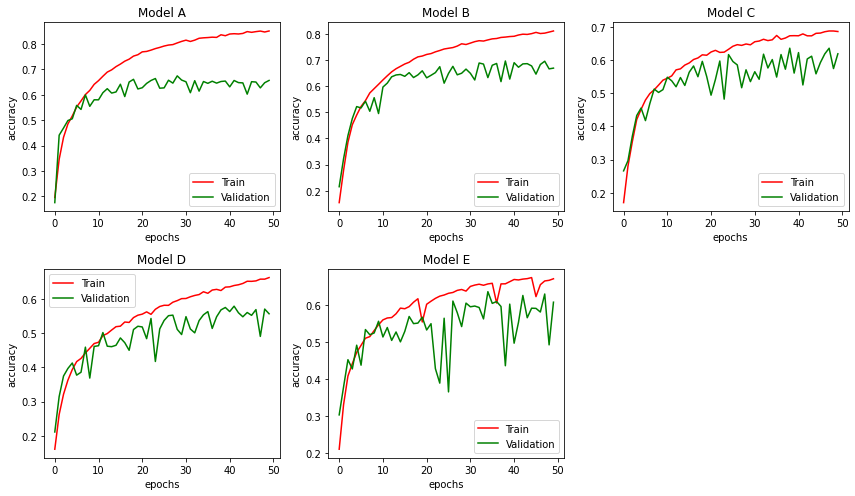

In [108]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 7))

plot_accuracy(ax1, hist_cnn_c1, 'Model A')
plot_accuracy(ax2, hist_cnn_c2, 'Model B')
plot_accuracy(ax3, hist_cnn_c3, 'Model C')
plot_accuracy(ax4, hist_cnn_c4, 'Model D')
plot_accuracy(ax5, hist_cnn_c5, 'Model E')
ax6.set_axis_off()
fig.tight_layout()